# Image Classification Neural Networks

The purpose of this project is to build a Convolutional Neural Network (CNN) to classify images. I will be making use of a subset of images from the OpenImages dataset, to train a CNN using TensorFlow that will be able to classify images containing either a dog or a cat.

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading the Data

I split the data up into train and test folders, which are further divided into cat or dog folders for simplicity. Now we can use TensorFlow's ImageDataGenerator to easily get our data. In addition, we will apply some augmentation, such as shears and flips.

In [ ]:
# Working with a zip file, so let's unzip it
from zipfile import ZipFile

with ZipFile('images.zip', 'r') as zipf:
  zipf.extractall()

Let's apply some data augmentation:

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory('resized2/train', target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('resized2/valid',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10372 images belonging to 2 classes.
Found 2594 images belonging to 2 classes.


## Define Our CNN

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
# Here I am adding the input layer along with the first convolutional layer with a ReLU activation function
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.2))


# 2nd convolutional block - increase the number of filters to hopefully detect more complex features
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.2))


# 3rd convolutional block - increase the number of filters to hopefully detect more complex features
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.2))


# 4th convolutional block - increase the number of filters to hopefully detect more complex features

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.2))

# flatten convolution output into a single vector
cnn.add(tf.keras.layers.Flatten())

# fully connected layers
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 61, 61, 64)       

In [ ]:
history = cnn.fit(training_set, validation_data=test_set, epochs=25)

Epoch 1/25
325/325 [==============================] - 58s 166ms/step - loss: 0.9199 - accuracy: 0.5618 - val_loss: 1.0162 - val_accuracy: 0.5027
Epoch 2/25
325/325 [==============================] - 53s 163ms/step - loss: 0.6701 - accuracy: 0.5978 - val_loss: 0.8876 - val_accuracy: 0.5640
Epoch 3/25
325/325 [==============================] - 53s 164ms/step - loss: 0.6511 - accuracy: 0.6206 - val_loss: 0.6310 - val_accuracy: 0.6488
Epoch 4/25
325/325 [==============================] - 53s 163ms/step - loss: 0.6365 - accuracy: 0.6438 - val_loss: 0.7837 - val_accuracy: 0.5860
Epoch 5/25
325/325 [==============================] - 53s 163ms/step - loss: 0.6269 - accuracy: 0.6562 - val_loss: 0.8429 - val_accuracy: 0.5956
Epoch 6/25
325/325 [==============================] - 53s 164ms/step - loss: 0.6117 - accuracy: 0.6716 - val_loss: 0.5776 - val_accuracy: 0.6920
Epoch 7/25
325/325 [==============================] - 53s 164ms/step - loss: 0.5940 - accuracy: 0.6858 - val_loss: 0.6992 - val_ac

In [ ]:
additional_history = cnn.fit(training_set, validation_data=test_set, epochs=5)

Epoch 1/5
325/325 [==============================] - 55s 169ms/step - loss: 0.3788 - accuracy: 0.8260 - val_loss: 0.5869 - val_accuracy: 0.7379
Epoch 2/5
325/325 [==============================] - 54s 166ms/step - loss: 0.3705 - accuracy: 0.8294 - val_loss: 0.4356 - val_accuracy: 0.8045
Epoch 3/5
325/325 [==============================] - 53s 164ms/step - loss: 0.3625 - accuracy: 0.8341 - val_loss: 0.4623 - val_accuracy: 0.7833
Epoch 4/5
325/325 [==============================] - 54s 166ms/step - loss: 0.3598 - accuracy: 0.8306 - val_loss: 0.4219 - val_accuracy: 0.8015
Epoch 5/5
325/325 [==============================] - 53s 164ms/step - loss: 0.3465 - accuracy: 0.8402 - val_loss: 0.4640 - val_accuracy: 0.7714


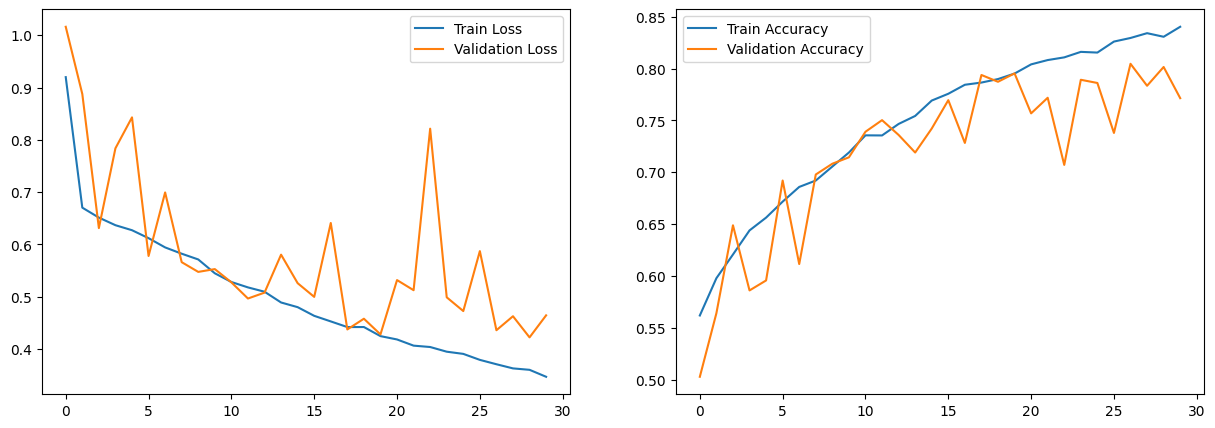

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(15,5))

ax1.plot(history.history['loss'] + additional_history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'] + additional_history.history['val_loss'], label='Validation Loss')

ax2.plot(history.history['accuracy'] + additional_history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'] + additional_history.history['val_accuracy'], label='Validation Accuracy')

ax1.legend()
ax2.legend()
plt.show()

## Plotting a few pictures from the validation set along with their prediction

In [ ]:
cats = np.random.choice([img for img in test_set.filenames if "cat/" in img], size=3)
dogs = np.random.choice([img for img in test_set.filenames if "dog/" in img], size=3)

In [ ]:
images_to_plot = cats.tolist() + dogs.tolist()

In [ ]:
def plot_img_and_prediction(img_path, true_class):
  img_path = f'resized2/valid/{img_path}'
  test_image = tf.keras.preprocessing.image.load_img(img_path, target_size = (128, 128))
  test_image = tf.keras.preprocessing.image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  pred = cnn.predict(test_image)
  pred = np.round(pred).astype(int).flatten()

  class_dict = {k: v for v,k in training_set.class_indices.items()}

  plt.figure()
  plt.imshow(plt.imread(img_path))

  predicted_class = class_dict[pred[0]]

  if true_class == predicted_class:
    color="green"
  else:
    color="red"

  plt.title(f"Predicted Label: {predicted_class}", color=color)

  plt.axis('off')
  plt.show()


1/1 [==============================] - 0s 21ms/step


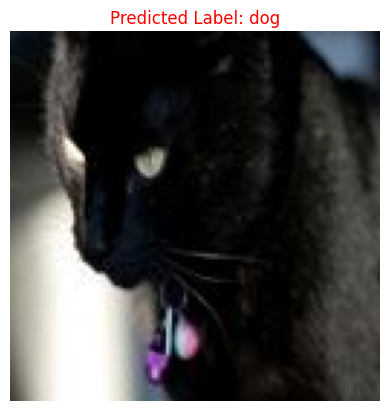

1/1 [==============================] - 0s 18ms/step


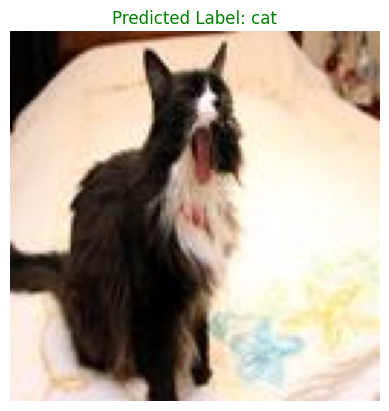

1/1 [==============================] - 0s 21ms/step


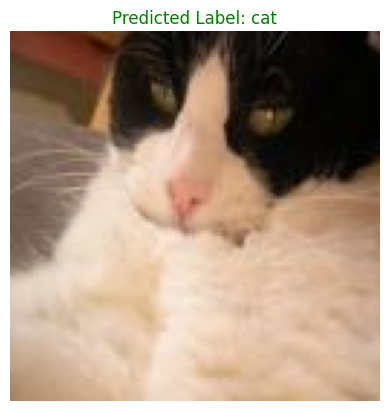

1/1 [==============================] - 0s 23ms/step


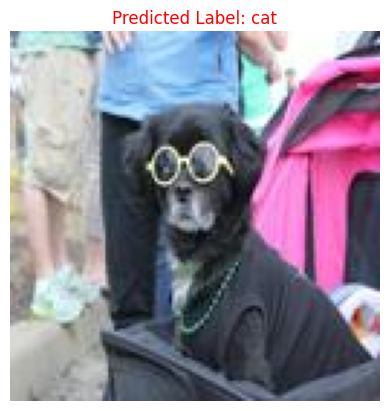

1/1 [==============================] - 0s 18ms/step


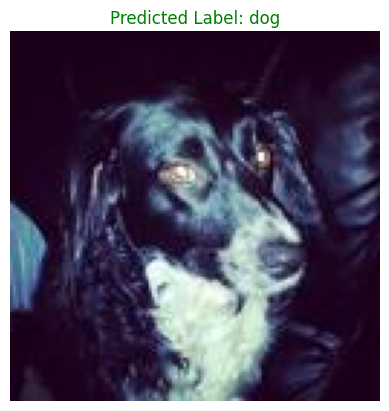

1/1 [==============================] - 0s 28ms/step


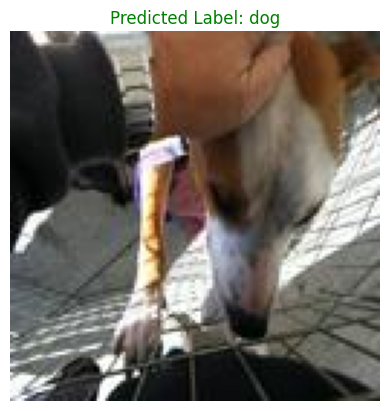

In [ ]:
for img in images_to_plot:
  plot_img_and_prediction(img, img.split("/")[0])